# zoom in IC

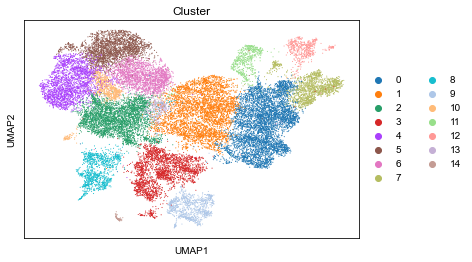

In [ ]:
sc.pl.umap(ad, color='Cluster')

In [ ]:
sc.tl.leiden(ad, resolution=0.1, restrict_to=('Cluster', ['12']))

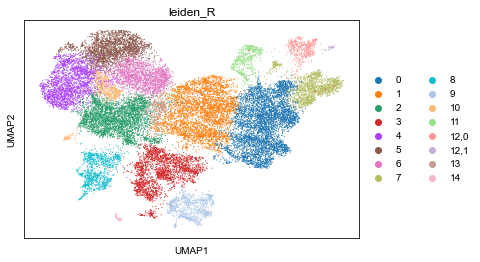

In [ ]:
ax = sc.pl.umap(ad, color='leiden_R', show=False)

In [ ]:
ad.obs['leiden_R'] = ad.obs['leiden_R'].map(lambda x:x.replace(',', '-'))

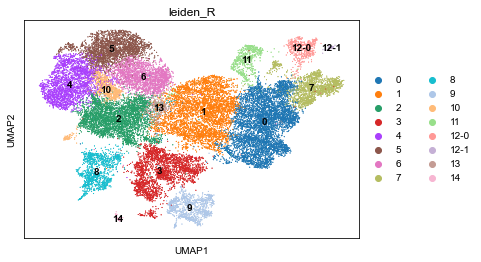

In [ ]:
ax = sc.pl.umap(ad, color='leiden_R', show=False, legend_loc='on data')
sc.pl.umap(ad, color='leiden_R', ax=ax)

Text(0, 0.5, '')

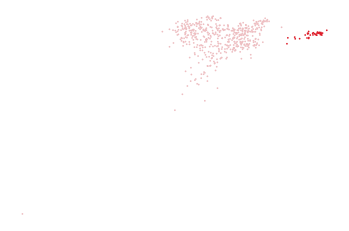

In [ ]:
sc.pl.umap(
    ad[ad.obs.eval("Cluster in ['12']")],
    color="leiden_R", show=False, palette=['#EEBFC2', '#DE1E2A'], legend_loc=None,size=12
)
sns.despine(left=True, bottom=True)
plt.title('')
plt.xlabel('')
plt.ylabel('')

## ALL detected SM

In [ ]:
ls_allDetectedSmGenes = (
    pd.read_excel(
        "/data/Zhaijx/liuzj/projects/singleCell/soybean/01_data/yangweicai/1-s2.0-S1673852722001242-mmc1.xlsx"
    )
    .dropna(subset=["Protein ID"])
    .eval(
        "geneID = `Protein ID`.str.replace('Glyma.', 'GLYMA_').str.split('.').str[0]",
        engine="python",
    )
    .query("geneID in @ad.var.index")["geneID"]
    .to_list()
)

on disk mode: False, transfer `<class 'scipy.sparse.csc.csc_matrix'>` to R:  End. Elapsed time: 33


(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 460  559  677  757 1226 3880 


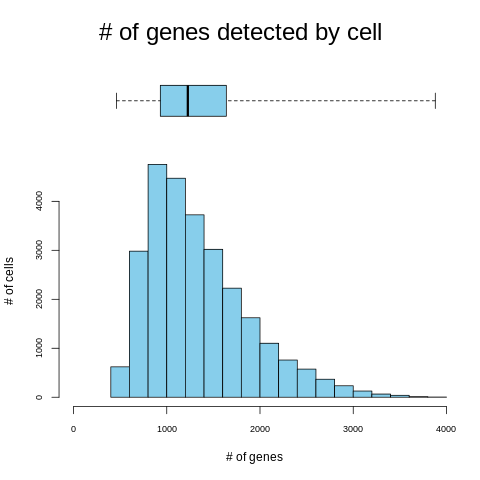

transfer `data.frame` to python:  End. Elapsed time: 4
transfer `data.frame` to python:  End. Elapsed time: 0


In [ ]:
singleCellTools.geneEnrichInfo.getAUCellScore(
    ad,
    {"sm": ls_allDetectedSmGenes},
    layer="raw",
    aucMaxRank=1000,
    label="smDetected_auc",
)

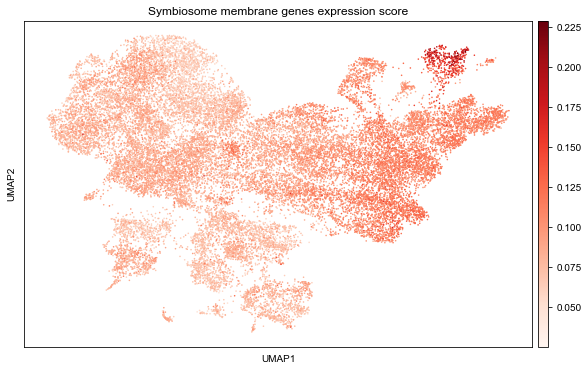

In [ ]:
with plt.rc_context({"figure.figsize": (10, 6)}):
    _ad = singleCellTools.plotting.obsmToObs(ad, "smDetected_auc")
    sc.pl.umap(
        _ad,
        color=_ad.uns["plot_obsm"],
        title=["Symbiosome membrane genes expression score"],
        cmap="Reds",
        size=10,
    )

In [ ]:
ls_palette = ["#EEBFC2", "#DE1E2A", "#126FB0", "#B5BE62", "#A0E192"]

Text(0.5, 0, '')

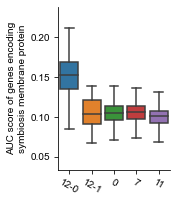

In [ ]:
fig, ax = plt.subplots(figsize=(2, 3))

sns.boxplot(
    data=_ad.obs.query("Cluster in ['0', '7', '11', '12']").eval(
        "leiden_R = leiden_R.cat.set_categories(['12-0', '12-1', '0', '7', '11'])",
        engine="python",
    ),
    x="leiden_R",
    y="sm", fliersize=0
)
plt.xticks(rotation=-30, ha="center")
plt.ylabel("AUC score of genes encoding\nsymbiosis membrane protein")

for i, (box, color) in enumerate(zip(ax.artists, ls_palette)):
    box.set_edgecolor(color)
    box.set_facecolor("white")
    # iterate over whiskers and median lines
    for j in range(6 * i, 6 * (i + 1)):
        ax.lines[j].set_color(color)
sns.despine()
plt.xlabel('')

In [ ]:
dt_smAuc = (
    _ad.obs.query("Cluster in ['0', '7', '11', '12']")
    .groupby("leiden_R")["sm"]
    .agg(list)
    .dropna()
    .to_dict()
)

In [ ]:
from scipy.stats import median_test
from itertools import product

In [ ]:
for x, y in product(dt_smAuc.keys(), dt_smAuc.keys()):
    p = median_test(dt_smAuc[x], dt_smAuc[y])[1]
#     if p < 0.05:
    print(x, y, median_test(dt_smAuc[x], dt_smAuc[y])[1])

0 0 1.0
0 7 0.2034484396014494
0 11 9.373972846965979e-14
0 12-0 8.224499692628447e-103
0 12-1 0.6260464254831073
7 0 0.2034484396014494
7 7 1.0
7 11 5.5428443678344805e-15
7 12-0 3.683277465427867e-122
7 12-1 0.6222062973914226
11 0 9.373972846965979e-14
11 7 5.5428443678344805e-15
11 11 1.0
11 12-0 1.0057250379484212e-150
11 12-1 0.8592595902966044
12-0 0 8.224499692628681e-103
12-0 7 3.683277465427867e-122
12-0 11 1.0057250379484212e-150
12-0 12-0 1.0
12-0 12-1 4.674072547402916e-10
12-1 0 0.6260464254831073
12-1 7 0.6222062973914226
12-1 11 0.8592595902966044
12-1 12-0 4.674072547402916e-10
12-1 12-1 1.0


In [ ]:
median_test(dt_smAuc['0'], dt_smAuc['12-1'])

(0.23746035776330274,
 0.6260464254831073,
 0.10513313313313313,
 array([[2434,   17],
        [2431,   21]]))

In [ ]:
# ad.write_h5ad(f"{dir_result}/ad_brief_com_version_1.h5ad")
f"{dir_result}/ad_brief_com_version_1.h5ad"

'/public/home/liuzj/projects/singleCell/soybean/02_result/20210922/analysis/noduleWithRoot//ad_brief_com_version_1.h5ad'

## marker

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(ad, 'raw', 'leiden_R')

In [ ]:
ad.obs['leiden_R'].str.replace(',', '-')

AAACCCAAGACGCAGT-1-batch-nodule_large       2
AAACCCAAGAGGATCC-1-batch-nodule_large    12-0
AAACCCACAAATACAG-1-batch-nodule_large       9
AAACCCACAGCAGTAG-1-batch-nodule_large       4
AAACCCACAGCTGTAT-1-batch-nodule_large       2
                                         ... 
TTTGTTGGTGTTACAC-1-batch-root               5
TTTGTTGTCAGTCCGG-1-batch-root               4
TTTGTTGTCCTCTTTC-1-batch-root               3
TTTGTTGTCGGTTGTA-1-batch-root               3
TTTGTTGTCTCATTTG-1-batch-root               6
Name: leiden_R, Length: 26712, dtype: object

In [ ]:
_dt = {'Developping Nodule': "Developing Nodule"}
ad.obs['Sample_new'] = ad.obs['Sample_new'].map(lambda x:_dt.get(x,x))

In [ ]:
ad.obs['Sample_new']

AAACCCAAGACGCAGT-1-batch-nodule_large    Mature Nodule
AAACCCAAGAGGATCC-1-batch-nodule_large    Mature Nodule
AAACCCACAAATACAG-1-batch-nodule_large    Mature Nodule
AAACCCACAGCAGTAG-1-batch-nodule_large    Mature Nodule
AAACCCACAGCTGTAT-1-batch-nodule_large    Mature Nodule
                                             ...      
TTTGTTGGTGTTACAC-1-batch-root                     Root
TTTGTTGTCAGTCCGG-1-batch-root                     Root
TTTGTTGTCCTCTTTC-1-batch-root                     Root
TTTGTTGTCGGTTGTA-1-batch-root                     Root
TTTGTTGTCTCATTTG-1-batch-root                     Root
Name: Sample_new, Length: 26712, dtype: category
Categories (3, object): ['Mature Nodule', 'Developing Nodule', 'Root']

In [ ]:
import importlib

importlib.reload(singleCellTools.plotting)

<module 'jpy_tools.singleCellTools.plotting' from '/public/home/liuzj/softwares/anaconda3/lib/python3.8/site-packages/jpy_tools/singleCellTools/plotting.py'>

Text(0.5, 0, 'Sub-cluster')

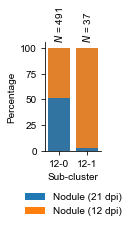

In [ ]:
fig, ax = plt.subplots(figsize=(1, 2))
singleCellTools.plotting.plotLabelPercentageInCluster(
    ad[ad.obs.eval("Cluster in ['12'] & Sample != 'Root'")],
    "leiden_R",
    "Sample_time",
    ax=ax,
    dt_kwargsForLegend=dict(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncol=1)
)
plt.xlabel("Sub-cluster")

Text(0.5, 0, 'Sub-cluster')

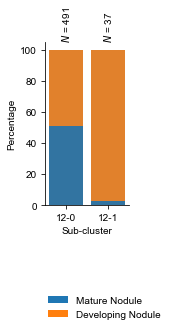

In [ ]:
fig, ax = plt.subplots(figsize=(1.5, 3))
singleCellTools.plotting.plotLabelPercentageInCluster(
    ad[ad.obs.eval("Cluster in ['12'] & Sample != 'Root'")],
    "leiden_R",
    "Sample_new",
    ax=ax,
    dt_kwargsForLegend=dict(loc="upper left", bbox_to_anchor=(-0.07, -0.5), ncol=1),
)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xlabel("Sub-cluster")

In [ ]:
ls_c12_1ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")
    .query("gene in @ls_knownSnfGenes")["gene"]
    .to_list()
)

In [ ]:
ls_c12_1ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")
    .query("gene in @ls_knownSnfGenes")["gene"]
    .to_list()
)

In [ ]:
ls_c12_1ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")["gene"]
    .to_list()
)

In [ ]:
ad.uns["leiden_R_cellexES"].query(
    "leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01"
).nlargest(50, "enrichScore").assign(
    SNF=lambda df: np.where(df["gene"].isin(ls_knownSnfGenes), "True", "")
).reset_index(drop=True).to_excel(f"{dir_result}/12_1_marker.xlsx")

transfer `data.frame` to python:  start
transfer `data.frame` to python:  End. Elapsed time: 0


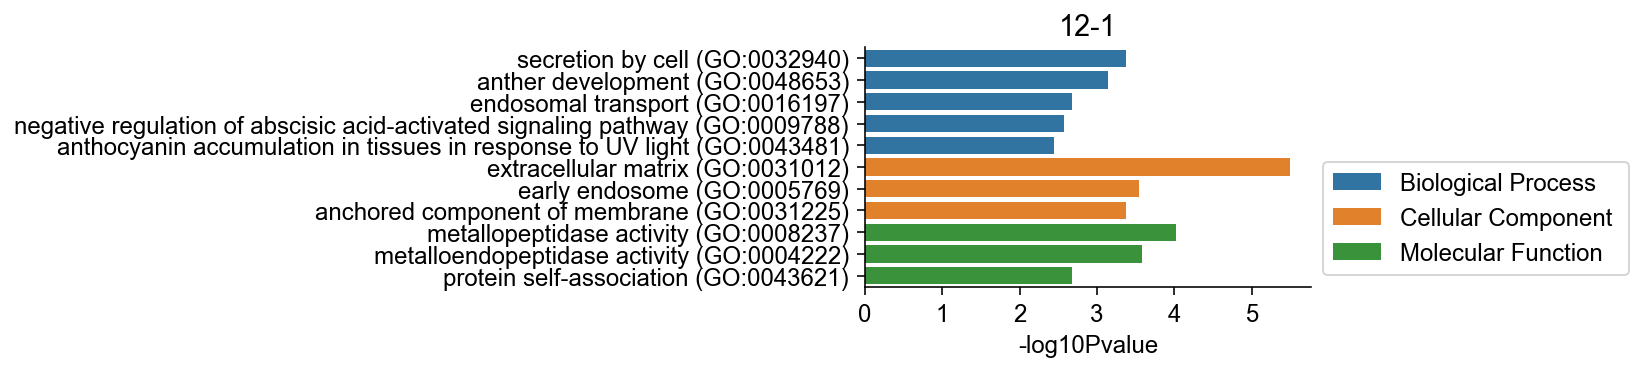

In [ ]:

df_go = enrichmentAnalysisGO(ls_c12_1ClusterGenes, ad.var.index.to_list(), dt_goToCat = dt_goToCat,  qvalueCutoff=0.2, pvalueCutoff=0.05)
if df_go.empty:
    print("Empty")
df_go.insert(0, 'Cluster', '12-1')

fig, ax = plt.subplots(figsize=(4, df_go.shape[0] * 0.2))
sns.barplot(data=df_go, x="-log10Pvalue", y="Description", hue = 'Category', ax=ax, dodge=False, palette=dt_goColor)
plt.legend(loc='lower left', bbox_to_anchor=[1,0])
plt.ylabel('')
sns.despine(top=True, right=True)
plt.title('12-1')
plt.show()

In [ ]:
from matplotlib import ticker

In [ ]:
len([x for x in ad.var.index if x in df_nodulationRelatedGene['Soybean Gene Parsed ID'].to_list()]), len(ad.var.index)

(251, 39337)

In [ ]:
[x for x in ls_c12SpercificGenes if x in df_nodulationRelatedGene['Soybean Gene Parsed ID'].to_list()], len(ls_c12SpercificGenes)

(['GLYMA_07G025800'], 33)

In [ ]:
[x for x in ls_c12_1ClusterGenes if x in df_nodulationRelatedGene['Soybean Gene Parsed ID'].to_list()], len(ls_c12_1ClusterGenes)

(['GLYMA_13G093600',
  'GLYMA_11G244800',
  'GLYMA_06G184400',
  'GLYMA_10G198700',
  'GLYMA_16G177500',
  'GLYMA_19G114600'],
 50)

In [ ]:
[x for x in ls_c12_0ClusterGenes if x in df_nodulationRelatedGene['Soybean Gene Parsed ID'].to_list()], len(ls_c12_0ClusterGenes)

([], 38)

(array([0, 1, 2, 3]),
 [Text(0, 0, '12-1 specific genes'),
  Text(1, 0, '12-0 specific genes'),
  Text(2, 0, '12 specific genes'),
  Text(3, 0, 'All detected genes')])

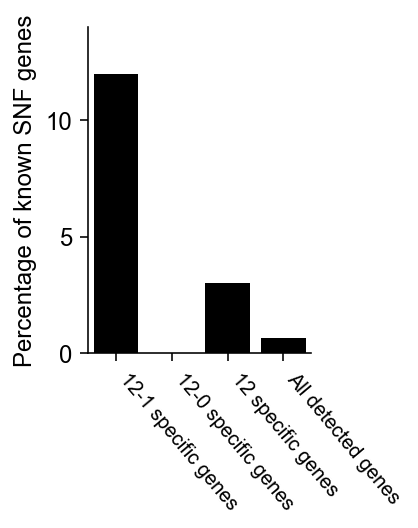

In [ ]:
fig, ax = plt.subplots(figsize=(2, 3))

# sns.barplot(y=["1", "2", "3"], x=[100, 100, 100], palette=["#D3D3D3"])
sns.barplot(
    x=["1", "2", "3", "4"],
    y=[6 / 50 * 100, 0 / 38 * 100, 1/33 * 100,  251 / 39337 * 100],
    palette=["black"],
)
plt.ylabel("Percentage of known SNF genes")
plt.ylim(0, 14)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.xticks(
    [0, 1, 2, 3], ["12-1 specific genes", "12-0 specific genes", "12 specific genes", "All detected genes"], rotation=-90, ha='center', fontsize=10
)
sns.despine()
plt.xticks(rotation=-50, ha='left')
# ls_legendHandle = []
# ls_legendLabel = ["Others", "Known SNF genes"]
# ls_legendHandle.append(plt.Rectangle((0, 0), 1, 1, fc="#D3D3D3", edgecolor="none"))
# ls_legendHandle.append(plt.Rectangle((0, 0), 1, 1, fc="black", edgecolor="none"))
# plt.legend(
#     ls_legendHandle[::-1],
#     ls_legendLabel[::-1],
#     frameon=False,
#     **dict(loc="upper left", bbox_to_anchor=(-0.5, -0.6), ncol=2)
# )

In [ ]:
ad.var["means_ForPickMock"] = ad.to_df('normalize_log').mean()
ad.var["bins_ForPickMock"] = pd.qcut(
    ad.var["means_ForPickMock"], 50, duplicates="drop"
)

In [ ]:
import tqdm


def staticTestForModuleGeneCounts(ad, ls_gene, propotion, shuffleCounts=500):
    ls_snfPropotion = []
    for i in tqdm.tqdm(range(shuffleCounts)):
        ls_bgGenes = singleCellTools.geneEnrichInfo.getBgGene(
            ad, ls_gene, usePreBin="bins_ForPickMock", seed=i, replacement=False
        )
        ls_bgSnfGenes = [
            x
            for x in ls_bgGenes
            if x in df_nodulationRelatedGene["Soybean Gene Parsed ID"].to_list()
        ]
        ls_snfPropotion.append(len(ls_bgSnfGenes) / len(ls_bgGenes))
    sns.histplot(ls_snfPropotion, bins=10)
    plt.axvline(propotion)
    ax = plt.gca()

    #     ls_snfPropotion.append(propotion)
    pvalue = len([x for x in ls_snfPropotion if x >= propotion]) / shuffleCounts
    #     df_snfPropotion = pd.concat([pd.Series(ls_snfPropotion), pd.Series(ls_snfPropotion).rank(ascending=False)], axis=1)
    #     pvalue = df_snfPropotion.loc[lambda df:df[0] == propotion].iat[0, -1] / shuffleCounts
    plt.text(
        propotion,
        0.95,
        f"P-value = {pvalue}",
        ha="right",
        transform=ax.get_xaxis_transform(),
    )
    plt.show()
    return ls_snfPropotion

In [ ]:
ls_c12_1ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")["gene"]
    .to_list()
)

100%|██████████| 1000/1000 [01:59<00:00,  8.34it/s]


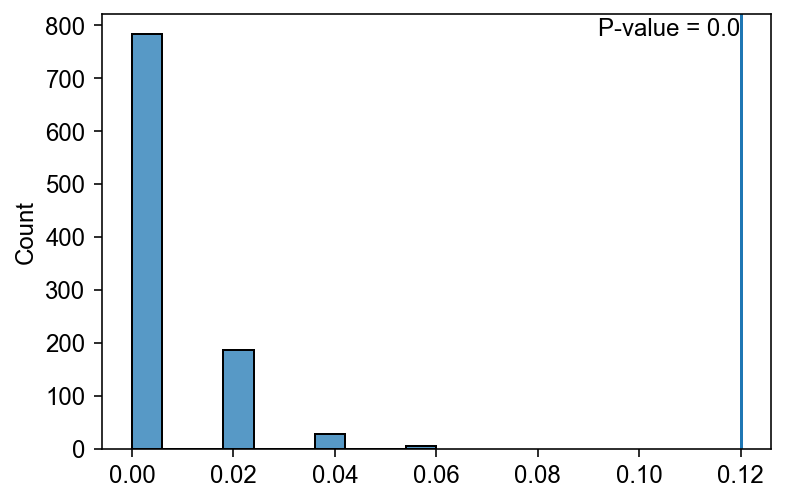

In [ ]:
ls_snfPropotion = staticTestForModuleGeneCounts(ad, ls_c12_1ClusterGenes, 0.12, 1000)

In [ ]:
from matplotlib import ticker

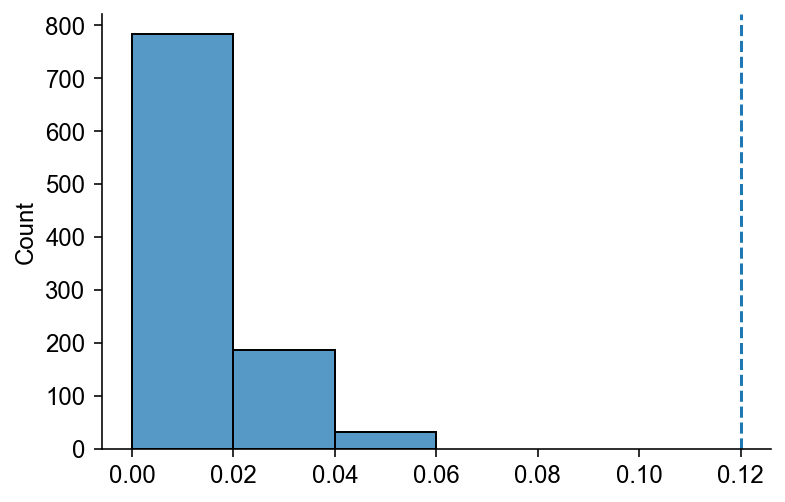

In [ ]:
sns.histplot(ls_snfPropotion, bins=[0, 0.02, 0.04, 0.06], stat='count')
plt.axvline(0.12, ls='--')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
sns.despine()

In [ ]:
plt.title('$\it{text you want to show in italics}$')

In [ ]:
sc.pl.correlation_matrix?

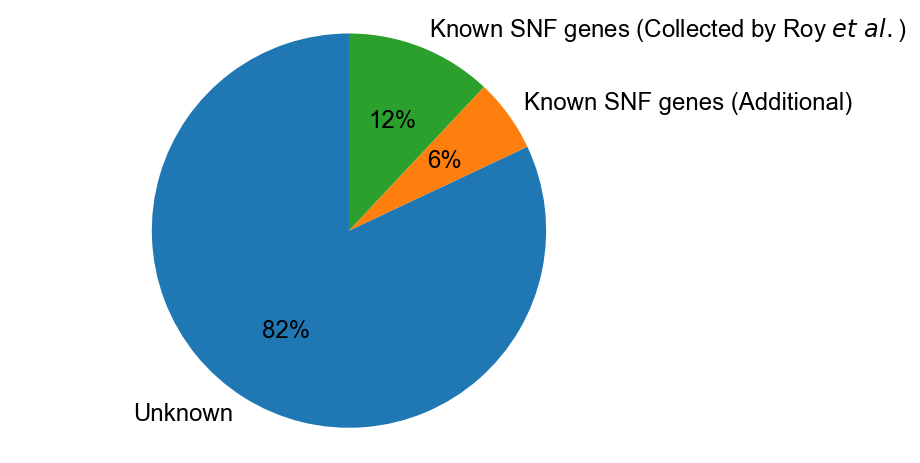

In [ ]:
labels = (
    "Unknown",
    "Known SNF genes (Additional)",
    "Known SNF genes (Collected by Roy $\it{et\ al.}$)",
)
sizes = [41, 3, 6]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct="%1.0f%%", startangle=90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
ls_c12_1ClusterGenes = [
    "GLYMA_13G093600", 1 SPK1
    "GLYMA_05G088400", 2 VPY
    "GLYMA_02G076900", 0 NNL1
    "GLYMA_11G244800", 1 NPL
    "GLYMA_06G184400", 1 RINRK1
    "GLYMA_10G198700", 1 RPG
    "GLYMA_19G146000", 0 SPL9d
    "GLYMA_16G177500", 1 CBS1
    "GLYMA_19G114600", 2 VPY
]

In [ ]:
ls_c12_1ClusterGenes = [
    "GLYMA_13G093600",
    "GLYMA_05G088400",
    "GLYMA_02G076900",
    "GLYMA_11G244800",
    "GLYMA_06G184400",
    "GLYMA_10G198700",
    "GLYMA_19G146000",
    "GLYMA_16G177500",
    "GLYMA_19G114600",
]

In [ ]:
ls_c12_1ClusterNames = [
    "SPK1",
    "VPY",
    "NNL1",
    "NPL",
    "RINRK1",
    "RPG",
    "SPL9d",
    "CBS1",
    "VPY",
]
ls_c12_1ClusterNames = [f"{x}\n({y})" for x,y in zip(ls_c12_1ClusterGenes, ls_c12_1ClusterNames)]

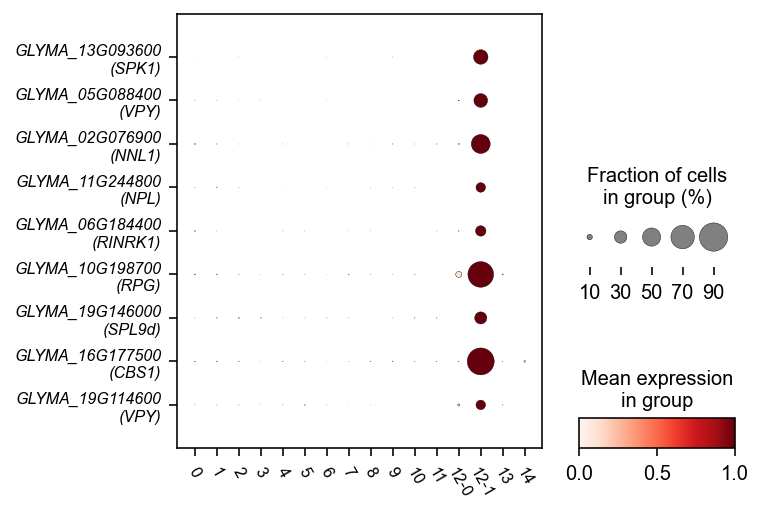

In [ ]:
axs = sc.pl.dotplot(
    ad,
    ls_c12_1ClusterGenes,
    groupby="leiden_R",
    cmap="Reds",
    layer="normalize_log",
    swap_axes=True,
    show=False,
    figsize=(5, 4),
    standard_scale="var",
)
plt.sca(axs["mainplot_ax"])
plt.yticks(
    range(len(ls_c12_1ClusterNames)) | F(map, lambda x: x + 0.5) | F(list),
    ls_c12_1ClusterNames,
    style="italic",
    size=8,
)
plt.xticks(rotation=-60, ha="center", size=8)
plt.show()

In [ ]:
from matplotlib import ticker

In [ ]:
axs

[<AxesSubplot:title={'center':'GLYMA_13G093600\n(SPK1)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_05G088400\n(VPY)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_02G076900\n(NNL1)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_11G244800\n(NPL)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_06G184400\n(RINRK1)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_10G198700\n(RPG)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_19G146000\n(SPL9d)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_16G177500\n(CBS1)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'GLYMA_19G114600\n(VPY)'}, xlabel='UMAP1', ylabel='UMAP2'>]

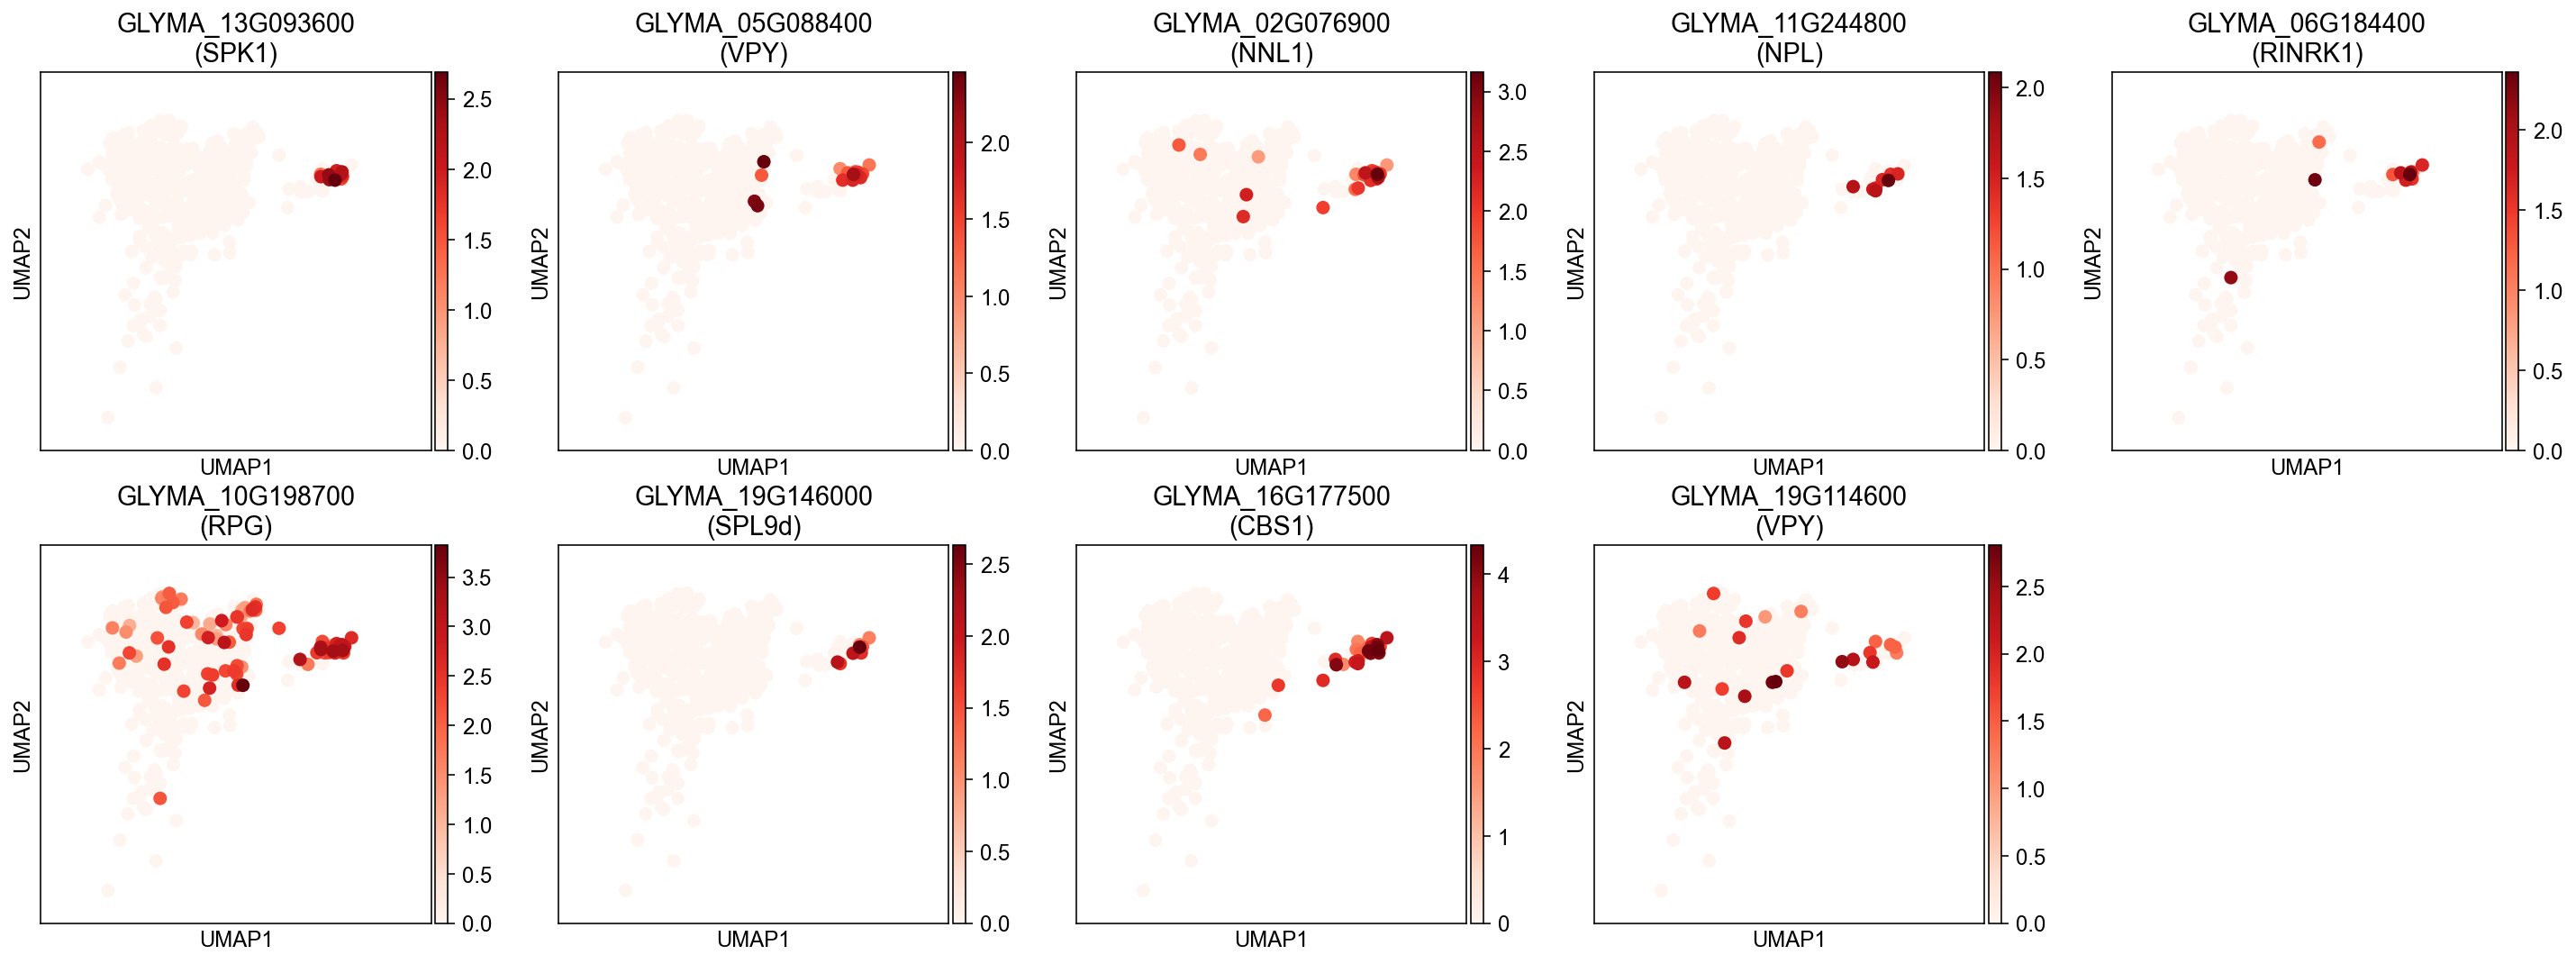

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
    axs = sc.pl.umap(
        ad[ad.obs.eval("Cluster == '12'")],
        color=ls_c12_1ClusterGenes,
        title=ls_c12_1ClusterNames,
        cmap="Reds",
        layer="normalize_log",
        ncols=5,
    #     size=15,
        show=False
    )
    for ax in axs:
        plt.sca(ax)
    #     ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    #     ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
        plt.xlim(8,13)
        plt.ylim(8,15)

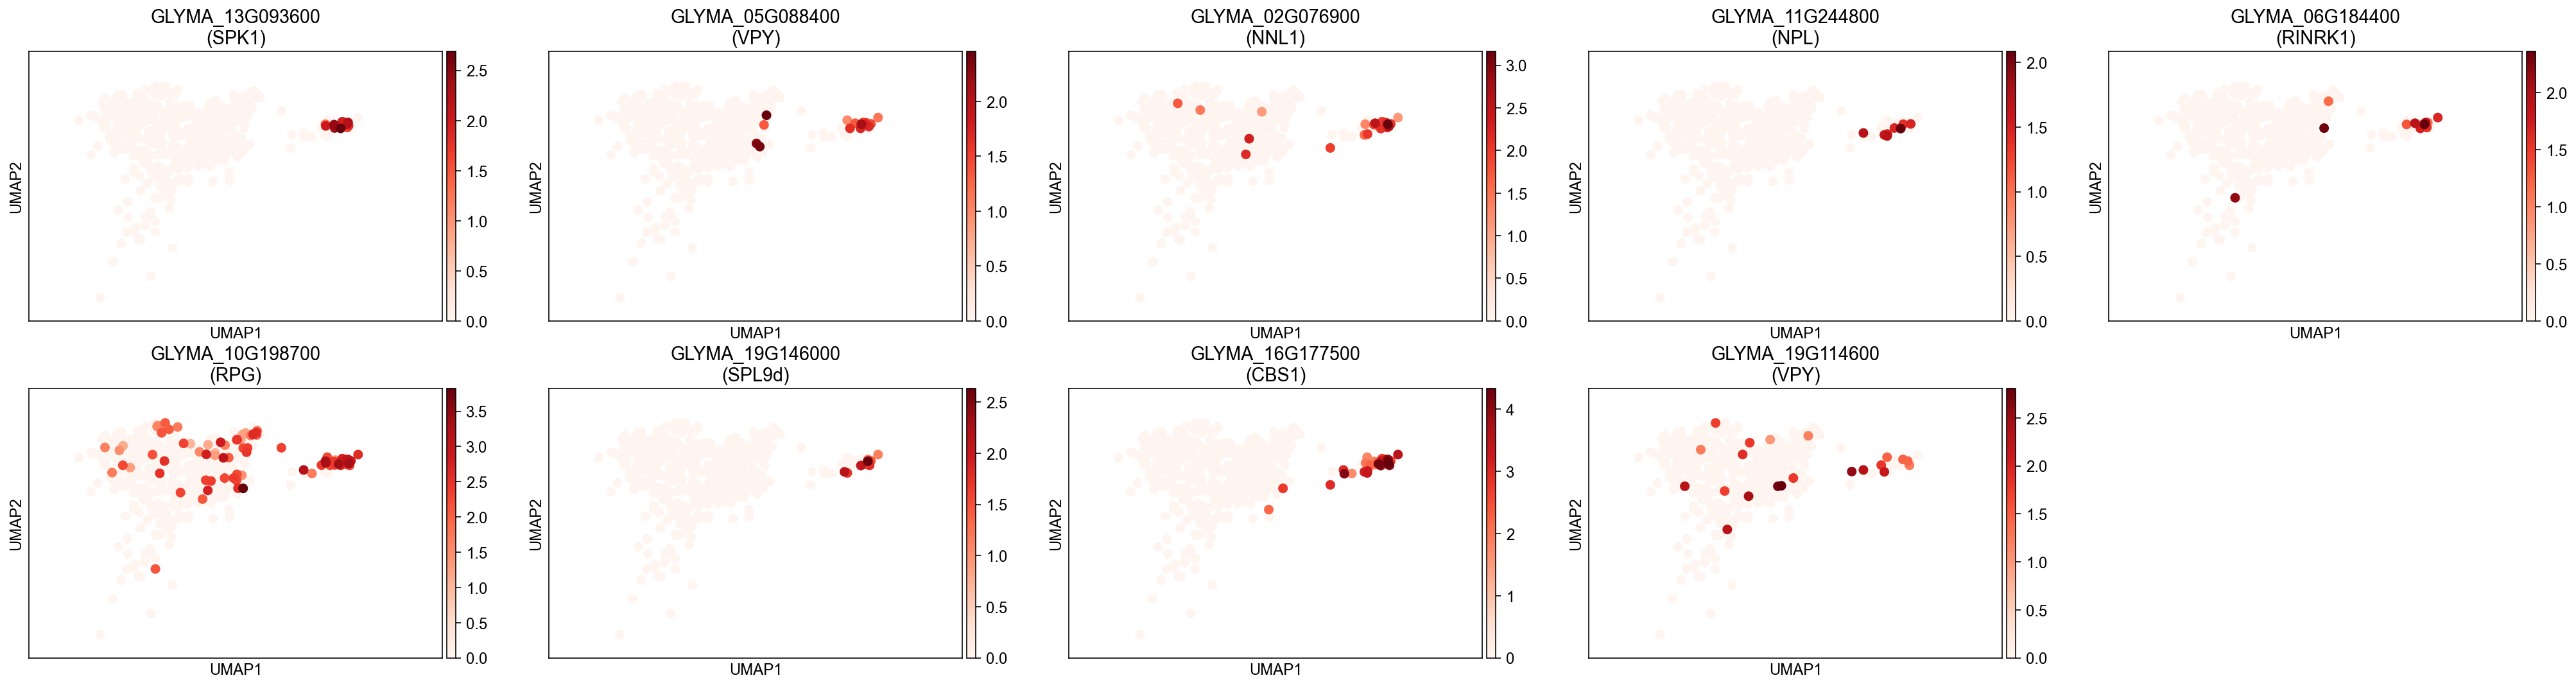

In [ ]:
axs = sc.pl.umap(
    ad[ad.obs.eval("Cluster == '12'")],
    color=ls_c12_1ClusterGenes,
    title=ls_c12_1ClusterNames,
    cmap="Reds",
    layer="normalize_log",
    ncols=5,
#     size=15,
    show=False
)
for ax in axs:
    plt.sca(ax)
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.xlim(8,13)
    plt.ylim(8,15)

In [ ]:
df_cellexEs = ad.uns["leiden_R_cellexES"].query("leiden_R == '12,1'")

## expression in bulk rh data

In [ ]:
ls_c12_1ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,1' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")["gene"]
    .to_list()
)

ls_c12_0ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '12,0' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")["gene"]
    .to_list()
)

In [ ]:
df_rhRpkm = pd.read_excel("/data/Zhaijx/liuzj/projects/singleCell/soybean/01_data/bulkRHData/Soybean RH _FPKM.xls")

In [ ]:
ad_rh =sc.AnnData(df_rhRpkm.iloc[:, :7].set_index('gene')).T

In [ ]:
ad_rh.var = ad_rh.var.rename(index = lambda sr:sr.replace('Glyma.', 'GLYMA_'))

In [ ]:
ad_rh.X = np.log1p(ad_rh.X)

In [ ]:
ad_rh.obs = ad_rh.obs.assign(id = lambda x:x.index, time = lambda x:x.index.str[:2], treat = lambda x:x.index.str[2:4])

In [ ]:
ad_rh = ad_rh[:, ad_rh.X.sum(0) > 0]

In [ ]:
_ls = ['12IN_RH', '12UN_RH', '24IN_RH', '24UN_RH', '48IN_RH', '48UN_RH']
_ls = [_ls[x] for x in [0,2,4,1,3,5]]
ad_rh = ad_rh[_ls]
ad_rh.obs['id'] = ad_rh.obs['id'].astype('category').cat.set_categories(_ls)

Trying to set attribute `.obs` of view, copying.


In [ ]:
# ad_rh = ad_rh[[0,1,3,4]]

In [ ]:
ad_rh.layers['X'] = ad_rh.X

Trying to set attribute `.obs` of view, copying.


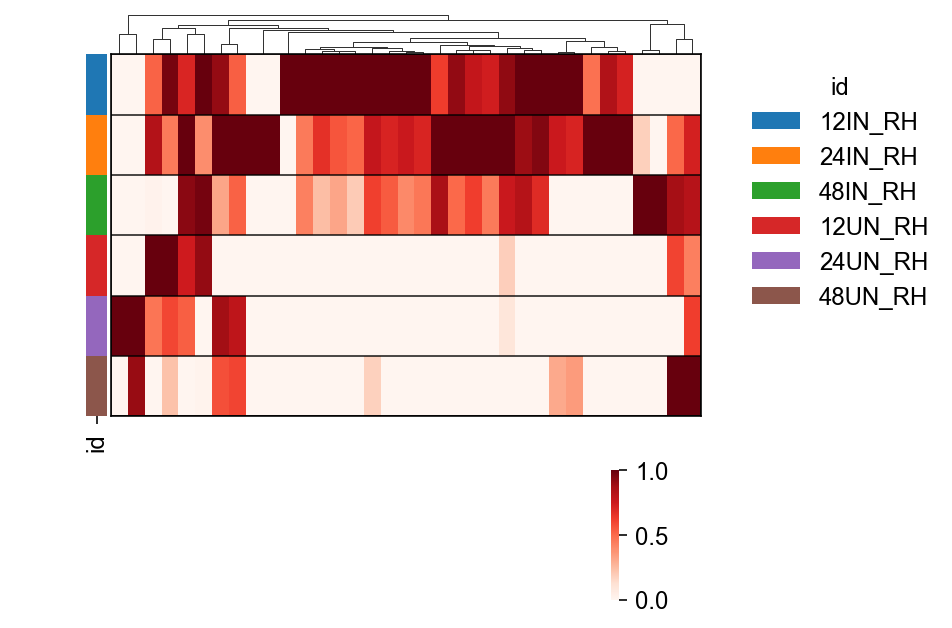

In [ ]:
singleCellTools.plotting.clustermap(
    ad_rh,
    {"a": [x for x in ls_c12_1ClusterGenes if x in ad_rh.var.index]},
    obsAnno="id",
    layer="X",
    add_gene_name=False,
    col_cluster=True,
    dendrogram_ratio=0.1,
    figsize=(6, 5), standard_scale =1
)

In [ ]:
ls_c12_0ClusterGenes = (
    ad.uns["leiden_R_cellexES"]
    .query("leiden_R == '11' & expressed_ratio > 0.2 & expressed_ratio_others < 0.01")
    .sort_values("enrichScore")
    .nlargest(50, "enrichScore")["gene"]
    .to_list()
)

Trying to set attribute `.obs` of view, copying.


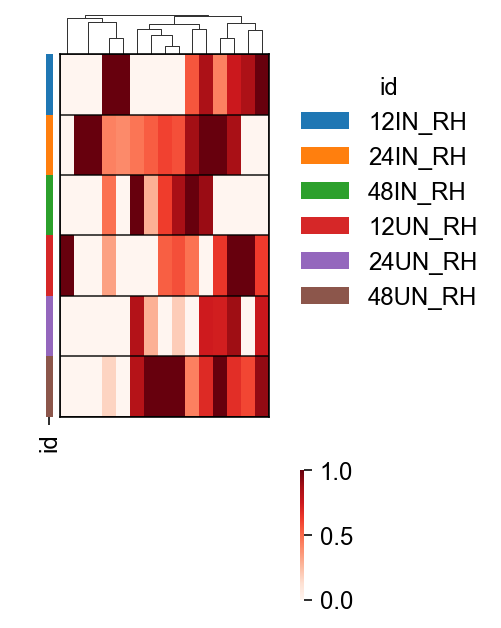

In [ ]:
singleCellTools.plotting.clustermap(
    ad_rh,
    {"a": [x for x in ls_c12_0ClusterGenes if x in ad_rh.var.index]},
    obsAnno="id",
    layer="X",
    add_gene_name=False,
    col_cluster=True,
    dendrogram_ratio=0.1, standard_scale =1,
    figsize=(3, 5),
)